# Scientific Question: How conserved are the human APP and APLP sequences, are their E2 dimerization regions structurally distinct?

# Background:

APP or amyloid precursor protein is the precursor to the amyloid beta protein that forms the pathological plaques seen in Alzheimer's disease. Recent studies have indicated that the E2 region of APP is able to form homodimers that may increase secretion of amyloid beta (Scheurmann).

Currently, animal models of Alzheimer's disease are limited by the fact that the most effective way to induce an Alzheimer's-like pathology is using an APP single gene mutation, which is not necessarily reflective of the sporadic cases of the disease, which is up to 90% of all cases (King).

Thus, it may be useful to try to understand an alternative pathology or biomarker for Alzheimer's that we can use to develop more sophisticated models of the disease. APLP1 or amyloid-like precursor protein 1 is part of the amyloid protein family, with research showing it can form plaques (Bayer) and is upregulated in Alzheimer's Disease (Yanagida)


# Scientific Hypothesis

If APLP1 and APP have conserved sequences (as determined by MSA) and similar E2 regions, then APLP1 may dimerize similarly to APP, which would allow us to use it as a novel Biomarker for studying the progression of Alzheimer's Disease in animal models. 

# Data: 

In order to acquire more data on these proteins, I relied on the National Center for Biotechnology Information's Nucleotide tool.Nucleotide is an accumulation of sequence data from research repositories like GenBank, PDB, research papers, and many others. Having access to such a wide pool of information allowed me to find sequence data for both APP (in multiple different species) along with APLP1 and successfully download isoforms that I wanted to use for this project. Here's the link: https://www.ncbi.nlm.nih.gov/nucleotide/

What about the structure of APLP1 & APP? This was obtained through the RCSB Protein Database, which allowed me to obtain structural information about the E2 region of APLP1 and APP. This is because the PDB acts as a repository for scientists to submit protein data often discovered through their research projects which is helpful, especially for those with more niche protein interests. As long as the paper has submitted data to PDB, you are easily able to find it and load it with ngl (more on that later).

First, I wanted to determine how conserved the sequence between APLP1 and APP are, with the expectation that the most conservation will be seen between the human forms of each protein. I ran a MSA between APLP1 and similarly sized isoforms of human APP, dog APP, chicken APP, and pig APP (all sourced from NCBI). This allows me to see the similarity between these sequences. I used the MAFFT program after many rounds of trial and error to conduct a multiple sequence alignmemt.

One useful way to visualize sequence conservation after running MSA is through logomaker, a Python package that creates sequence logos which highlights conserved domains between sequences aligned by MSA. I used the alignment file generated by MSA to create a sequence logo for an extract of the E2 region of APP compared to APLP just to see if there was any similarity. 

What about the E2 domain and its structural similarities? It is best to understand this with structural bio-informatics which means modelling the structure. I used the PDB to get PDB files of the E2 domain for both APP & APLP1 of humans. NGL view is one way to visualize proteins and alter their representations. If I were to alter their representations it would be based upon my findings doing 3d measurements to accentuate regions of homology and regions of difference. Understanding the structure of these compounds is important to contextualize the similarity of these compounds and interpreting the heat map results. Compound structures can be shown in 2D and 3D. The second bioinformatics analyses done in this notebook are structure images.

Both of these methods help me answer my scientific question because the MSA and sequence logo show me the extent to which APP and APLP are conserved in parts of their E2 domain, while the structural bioinformatics analysis highlights structural similarities and differences between the regions.

In [2]:
conda install -c conda-forge biopython


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge nglview


Note: you may need to restart the kernel to use updated packages.


In [9]:
conda install -c bioconda logomaker


Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [66]:
conda install -c anaconda numpy



Note: you may need to restart the kernel to use updated packages.


In [200]:
#packages to import 
from Bio import SeqIO
import numpy as np
from Bio import pairwise2
from Bio.Seq import Seq
from Bio import Align
from Bio import AlignIO
from Bio.pairwise2 import format_alignment
from Bio import Phylo
from Bio.PDB import *
import nglview
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm
from Bio.Align.Applications import MafftCommandline
import ipywidgets
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from collections import Counter
from Bio import Phylo, AlignIO

## What are the packages?
Bio: This is the bioconda package that we installed at the beginning of the quarter. Because I had technical difficulties and have had to use someone else's computer, I had to install Bio again. It has several great functionalities for conducting bioinformatics analysis in python. The ones I use in particular are the Align function (to perform a seq alignment and read them), the Phylo function (for a phylogenetic tree), the Seq function (to read fasta files as sequences), and the PDB function to understand proteins. Bio applications like Align and ProtParam helped me with the two main components of my project: the ,utliple sequence alignment and protein structure.

NGL View: NGL view was the package I used to visualize the E2 protein and is very useful for conducting 3D protein measurements and adding various representations to highlight different aspects of the structure.

Logomaker: I am using logomaker to identify conserved sequences in my multiple sequence alignment. Although logomaker doesn't work well with large sequences, it is very good at visualizing the results of a multiple sequence alignment for small sequence groups.

Matplotlib: Matplotlib is a package we are familiar with from DataCamp as it used to visualize most things in Python. Some of the other packages I installed require that Matplotlib be preinstalled for optimal visualization, which is why I have installed it above. 

Numpy: I used numpy to make an array of my data so I could see how the sequences related to one another in terms of length.

Phylo: Phylo was used to create a phylogenetic tree and perform phylogenetic clustering on my aligned sequence data. It works well with larger sets of data in terms of the information it can display. 

ProtParam: I used this bioconductor function which uses PDB structures as inputs and can be used to feedback structural and sequential information about the protein of interest. Different outputs include molecular weights, amino acid counts, and their distribution as outputs.

Before running the code, make sure you have all of the data files in an accessible environment! I found my fasta files on NCBI Nucleotide, and the PDB files are from RSCI. The unaligned.fasta and aligned.fasta are generated by the code, but are attached in the GitHub repository for convinience. 

## Multiple Seq Alignment between multi-species APP & APLP

In this section, we conduct MSA between amyloid precursor protein of humans, dogs, chickens, and pigs against human amyloid precursor like protein 1. This will help us see what (if any) conserved regions exist between the two proteins. I used a single isoform from each species and each is similarly sized for ease of calculation. In the first part of this code, we take the individual sequences and merge them into a single fasta file. This "unaligned" file is fed into MAFFT, which allows us to do multiple sequence alignment. It is hard to visualize the results of MSA, so we use logomaker to create a sequence logo of our data and see the conserved regions.

In [8]:
#Load files and define objects. I chose isoforms of these proteins that were relatively close in length. 
Human_APP = SeqIO.read("Human_APP.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
Human_Len=(len(Human_APP))

#Human APLP1 was used for this file 
APLP = SeqIO.read("APLP1.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
APLP_Len=(len(APLP))

Dog_APP = SeqIO.read("Dog_APP.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
Dog_Len=(len(Dog_APP))

Pig_APP = SeqIO.read("Pig_APP.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
Pig_len=(len(Pig_APP))

Chicken_APP = SeqIO.read("Chicken_APP.fa", "fasta")
#This is a code check, to make sure the isoform length matches that on NCBI
Chicken_len=(len(Chicken_APP))

#Making fasta files into sequence objects 
APLP_Seq= APLP.seq
#Labels for clarity 
print("APLP_Seq (Human)")
#Printing the sequence 
print(APLP_Seq)
APLP_Seq_Str=str(APLP_Seq)

Human_APP_Seq= Human_APP.seq
print("Human_APP_Seq")
print(Human_APP_Seq)
Human_APP_Seq_Str=str(Human_APP_Seq)

Dog_APP_Seq= Dog_APP.seq
print("Dog_APP_Seq")
print(Dog_APP_Seq)
Dog_APP_Seq_Str=str(Dog_APP_Seq)

Chicken_APP_Seq= Chicken_APP.seq
print("Chicken_APP_Seq")
print(Chicken_APP_Seq)
Chicken_APP_Seq_Str=str(Chicken_APP_Seq)

Pig_APP_Seq= Pig_APP.seq
Pig_APP_Seq_Str=str(Pig_APP_Seq)
print("Pig_APP_Seq")
print(Pig_APP_Seq)

APLP_Seq (Human)
MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLAGGSPGAAEAPGSAQVAGLCGRLTLHRDLRTGRWEPDPQRSRRCLRDPQRVLEYCRQMYPELQIARVEQATQAIPMERWCGGSRSGSCAHPHHQVVPFRCLPGEFVSEALLVPEGCRFLHQERMDQCESSTRRHQEAQEACSSQGLILHGSGMLLPCGSDRFRGVEYVCCPPPGTPDPSGTAVGDPSTRSWPPGSRVEGAEDEEEEESFPQPVDDYFVEPPQAEEEEETVPPPSSHTLAVVGKVTPTPRPTDGVDIYFGMPGEISEHEGFLRAKMDLEERRMRQINEVMREWAMADNQSKNLPKADRQALNEHFQSILQTLEEQVSGERQRLVETHATRVIALINDQRRAALEGFLAALQADPPQAERVLLALRRYLRAEQKEQRHTLRHYQHVAAVDPEKAQQMRFQVHTHLQVIEERVNQSLGLLDQNPHLAQELRPQIQELLHSEHLGPSELEAPAPGGSSEDKGGLQPPDSKDADTPMTLPKGSTEQDAASPEKEKMNPLEQYERKVNASVPRGFPFHSSEIQRDELAPAGTGVSREAVSGLLIMGAGGGSLIVLSMLLLRRKKPYGAISHGVVEVDPMLTLEEQQLRELQRHGYENPTYRFLEERP
Human_APP_Seq
MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVRVPTTAASTPDAVDKYLETPGDENEHAHFQ

In [58]:

# Take a dictionary as input to your DataFrame. The purpose for this is visualizing the sequences and their length(s)
my_dict = {'HumanAPP': [Human_APP_Seq, Human_Len], 'APLP1': [APLP_Seq, APLP_Len], 'DogAPP': [Dog_APP_Seq, Dog_Len]}
#Creating a numpy array as input for my DataFrame. I want to have the name, followed by the length, followed by the sequence so I can refer back to this
data = np.array([['Name','Seq Length','Seq'],
                ['Human APP',Human_Len, Human_APP_Seq],
                ['Human APLP1',APLP_Len, APLP_Seq],
                ['Dog APP',Dog_Len, Dog_APP_Seq],
                ['Pig APP',Pig_len, Pig_APP_Seq],
                ['Chicken APP',Chicken_len, Chicken_APP_Seq]])

#Creating my dataframe                
df=pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                 columns=data[0,1:])
#This is a code check to see if I have organized my DataFrame correctly 
print(df)
#This is a way to block the warning message that comes up. Since I am using this for visualization, this doesn't apply to me.
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

            Seq Length                                                Seq
Human APP          695  (M, L, P, G, L, A, L, L, L, L, A, A, W, T, A, ...
Human APLP1        651  (M, G, P, A, S, P, A, A, R, G, L, S, R, R, P, ...
Dog APP            695  (M, L, P, A, L, A, L, V, L, L, A, S, W, T, A, ...
Pig APP            695  (M, L, P, G, L, A, L, V, L, L, A, A, W, T, A, ...
Chicken APP        695  (M, L, P, H, L, A, L, L, L, L, A, A, G, A, A, ...


In [11]:
#making a list of sequences as strings
list_seq=[APLP_Seq_Str, Human_APP_Seq_Str, Dog_APP_Seq_Str, Pig_APP_Seq_Str, Chicken_APP_Seq_Str]
#Naming elements in a list 
list_name=["Human APLP1","Human APP", "Dog APP", "Pig APP", "Chicken APP"]
#Making my list into a fasta file
ofile = open("unaligned.fasta", "w")

for i in range(len(list_seq)):

    ofile.write(">" + list_name[i] + "\n" +list_seq[i] + "\n")

#above I created a for loop to ensure that each sequence is in a regular format with the list name followed by the sequence. I close the file afterwards.

ofile.close()

In [57]:
#Using the Mafft package for a multiple sequence alignment. I first need to input my newly created fasta file from the previous chunk.
mafft_cline=MafftCommandline(input="unaligned.fasta") 
#Create a new variable, align which consists of the output: a new fasta file containing the aligned sequences from MAFFT
align = AlignIO.read("aligned.fasta", "fasta") 
#This is a code check to make sure the format of my alignment is consistent.
print(align)

Alignment with 5 rows and 725 columns
MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLAGGS...-RP Human
----------------------MLPGLALLLLAAWTARALEVPT...MQN Human
----------------------MLPALALVLLASWTARALEVPT...MQN Dog
----------------------MLPGLALVLLAAWTARALEVPT...MQN Pig
----------------------MLPHLALLLLAAGAARALEVPA...MQN Chicken


In [60]:
#Extracting data from the aligned.fasta file in the format ID followed by sequence in a dictionary
seq_dict = {rec.id : rec.seq for rec in SeqIO.parse("aligned.fasta", "fasta")}
#For analysis, the sequences need to be strings, so I put them into a list of strings
seq_list=[str(rec.seq) for rec in SeqIO.parse("aligned.fasta", "fasta")]
#This is a code check to see how many sequences there are and their length to ensure that is the same. 
print('There are %d sequences, all of length %d'%(len(seq_list), len(seq_list[0])))
seq_list

There are 5 sequences, all of length 725


['MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLAGGSPGAAEAPGSAQVAGLCGRLTLHRDLRTGRWEPDPQRSRRCLRDPQRVLEYCRQMYPELQIARVEQATQAIPMERWCGGSRSGSCAHPHHQVVPFRCLPGEFVSEALLVPEGCRFLHQERMDQCESSTRRHQEAQEACSSQGLILHGSGMLLPCGSDRFRGVEYVCCPPPGTPD--PSGTAVGDPSTRSW-------PPGSR---V-EGAEDEE-----EEESFPQPVDDYFVEP-PQAEEEEE----------TVPPPSSHTLAVVGKVTPTPRPT-DGVDIYFGMPGEISEHEGFLRAKMDLEERRMRQINEVMREWAMADNQSKNLPKADRQALNEHFQSILQTLEEQVSGERQRLVETHATRVIALINDQRRAALEGFLAALQADPPQAERVLLALRRYLRAEQKEQRHTLRHYQHVAAVDPEKAQQMRFQVHTHLQVIEERVNQSLGLLDQNPHLAQELRPQIQELLHSEH----------------------LGPSELEA-------PAPGGSSEDKGGLQPPDSKDADTPMTLPKGSTEQDAASPEKEK------------MNPLEQYERKVNASV--PRGFPFHSSEIQRDELAPAGTGVSREAVSGLLIMGAGGGSLIVLSMLLLRRKKPYGAISHGVVEVDPMLTLEEQQLRELQRHGYENPTYRFLEE-RP',
 '----------------------MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHP-HFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVV-EVAEEEEVAEVEEEEADD

## Logomaker! 

We organize our aligned data into a dataframe because logomaker can read this input with ease. Logomaker takes the aligned data and shows the frequency of certain sequence components using height.  Logomaker is limited in the size of sequence it is able to process. For this reason, extraction of the sequences within the E2 domain (which we are interested in for its dimerization ability) is conducted. Using these smaller sequences, we build our logo and interpret the important sites.

In [132]:
#Logomaker is not optimal for large sequence visualization so we will extract a smaller portion of the sequence. The E2 domain is from position 291 to 473, so we will extract a small portion to see conserved regions. 
APLP1=seq_list[0]
APLP1_Extract=APLP1[360:410]

#Assigning the sequence to its corresponding name based on index position
APP_Human=seq_list[1]
#Choosing the region of index I want to extract 
APP_Human_Extract=APP_Human[360:410]

APP_Dog=seq_list[2]
Dog_Extract=APP_Dog[360:410]

APP_Pig=seq_list[3]
Pig_Extract=APP_Pig[360:410]

APP_Chicken=seq_list[4]
Chicken_Extract=APP_Chicken[360:410]

#Assemble all extracted sequences into a list
sequence_list=[APLP1_Extract,APP_Human_Extract, Dog_Extract, Pig_Extract, Chicken_Extract]



       A    D    E    F    G    H    I    K    L    M    N    P    Q    R  \
pos                                                                         
0    0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2    1.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4    5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       S    T    V    W  
pos                      
0    0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  5.0  
2    0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  


(-1.0, 50.0)

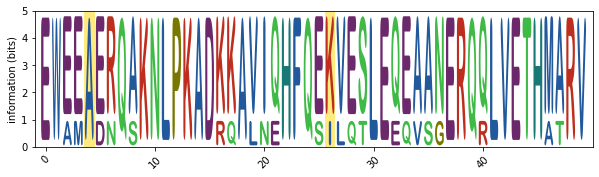

In [197]:
#Making a logomaker dataframe with the extracted sequence alignments by defining a global variable counts_df
counts_df=logomaker.alignment_to_matrix(sequences=sequence_list, to_type='counts', characters_to_ignore='.-X')
# preview counts dataframe, this is a code check to see if formatting is correct 
print(counts_df.head())
# create Logo object, here you can add fonts, color schemes, and set other aesthetic preferences
logo = logomaker.Logo(counts_df,
                         font_name='Arial Rounded MT Bold',
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=.8)

# style using Logo methods, mainly sizing, spacing, and highlighting 
logo.style_xticks(anchor=0, spacing=10, rotation=45)
logo.highlight_position(p=4, color='gold', alpha=.5)
logo.highlight_position(p=26, color='gold', alpha=.5)

# style using Axes methods
logo.ax.set_ylabel('information (bits)')
logo.ax.set_xlim([-1, len(counts_df)])

## Phylogenetic Clustering 

We are using phylogenetic clustering to better visualize how the sequences relate to one another. To do this, we cannot use normal fasta files as input files. I converted the fasta file to a clustal file in my first draft of the project and the file is located in my Github repository as one of the input files for this project. The phylogenetic clustering is useful to help visualize the conserved sequences between the 4 inputs. The horizontal line is the evolutionary distance between the sequences, and based on the relative location of sequences you can assess their similarities. 

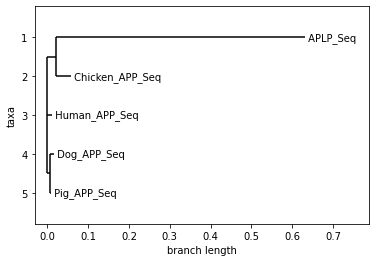

In [196]:
#Phylogenetic Clustering to see if there is any conservation between the sequences. 
tree = Phylo.read('clustalw.dnd','newick')
Phylo.draw(tree)

## Structural Bioinformatics of the E2 APP versus E2 APLP domain


Below we compare the structure of the E2 APP domain and E2 APLP1 domain to see if there are any differences. First I use structural bioinformatics to visualize the protein from PDB. Then I break down the structure into its constituent polypeptide and perform the necessary measurements that allow me to make a relevant comparison between the structures. In order to perform this analysis, you do need to have the PDB structure files loaded in and know their RSCI ID (which can be different from your file name). 

In [138]:
#Displaying APP E2 domain with structural bio-informatics, write observations. 
view = nglview.show_pdbid("3NYJ")  # load "APPE2" from RCSB PDB and display viewer widget, use ID from PDB 
view.clear_representations()
#add ribbons
view.add_cartoon('protein')
#add ball and stick for non-Protien
view.add_ball_and_stick('not protein')
view




NGLWidget()

In [140]:
#Making fasta files into sequence objects 
APP = SeqIO.read("3NYJ.fasta", "fasta")
APP_Seq= APP.seq
#Printing the sequence 
print("Sequence of the E2 Domain of APP")
print(APP_Seq)
#Using protein analysis to better understand protein structure 
analysed_seq = ProteinAnalysis(str(APP_Seq))
#Calculating molecular weight
print("Molecular Weight of the E2 Domain of APP")
print(analysed_seq.molecular_weight())
#Calculating hydropathy or how hydrophobic the sequence is
print("Grand Average of Hydropathy for E2 domain of APP")
print(analysed_seq.gravy())
#Calculating amino acid distribution
print("Amino Acid Count")
print(analysed_seq.count_amino_acids())


Sequence of the E2 Domain of APP
GSHMPTTAASTPDAVDKYLETPGDENEHAHFQKAKERLEAKHRERMSQVMREWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETHMARVEAMLNDRRRLALENYITALQAVPPRPRHVFNMLKKYVRAEQKDRQHTLKHFEHVRMVDPKKAAQIRSQVMTHLRVIYERMNQSLSLLYNVPAVAEEIQDEVDELLQ
Molecular Weight of the E2 Domain of APP
24304.323100000012
Grand Average of Hydropathy for E2 domain of APP
-0.914492753623188
Amino Acid Count
{'A': 22, 'C': 0, 'D': 9, 'E': 25, 'F': 4, 'G': 2, 'H': 11, 'I': 5, 'K': 15, 'L': 17, 'M': 9, 'N': 8, 'P': 9, 'Q': 16, 'R': 18, 'S': 7, 'T': 8, 'V': 16, 'W': 1, 'Y': 5}


# 3D Measurements 
Here I perform the 3D measurements, obtaining information about the sequence structure, hydrophobicity, molecular weight, and amino acid composition (among other things). I do this twice, once for each protein. In the analysis section I will qualitatively assess the output of these measurements. In order to perform these measurements, the structure needs to be loaded using PDB Parser. Measurements like these are like captions for the images shown above and a more rigorous and reliable way to compare two protein structures. 

In [198]:
#Defining structure for analysis, in this case the global variable is structure which we can access both inside and outside the for loop
pdb_parser = PDBParser()
structure = pdb_parser.get_structure("3NYJ", "APPE2.pdb")
#Using a for loop we can separate our structure into its polypeptides, finding the polypeptide sequence and length
polypeptide_builder = CaPPBuilder()
counter = 1
for polypeptide in polypeptide_builder.build_peptides(structure):
    seq = polypeptide.get_sequence()
    print(f"Sequence: {counter}, Length: {len(seq)}")
    print(seq)
    counter += 1

Sequence: 1, Length: 27
LETPGDENEHAHFQKAKERLEAKHRER
Sequence: 2, Length: 3
SQV
Sequence: 3, Length: 47
REWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETH
Sequence: 4, Length: 5
ARVEA
Sequence: 5, Length: 28
LNDRRRLALENYITALQAVPPRPRHVFN
Sequence: 6, Length: 23
LKKYVRAEQKDRQHTLKHFEHVR
Sequence: 7, Length: 13
VDPKKAAQIRSQV
Sequence: 8, Length: 9
THLRVIYER
Sequence: 9, Length: 18
NQSLSLLYNVPAVAEEIQ


In [187]:
# Create empty list for chains
all_seqs = []
counter = 1
 #For each polypeptide in the structure, we can run protein a analysis methods and store the results in a dictionary 
for polypeptide in polypeptide_builder.build_peptides(structure):
    seq_info = {} # create an empty dictionary so we can display the results nicely 
    seq = polypeptide.get_sequence() # get the sequence
    analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a string for analysis
    # Specify dict keys and values that we want to see    
    seq_info['Sequence Number'] = {counter} # set sequence id
    seq_info['Sequence'] = seq # store BioPython Seq() object
    seq_info['Sequence Length'] = len(seq) # length of seq
    seq_info['Molecular Weight'] = analyzed_seq.molecular_weight()
    seq_info['GRAVY'] = analyzed_seq.gravy() # hydrophobicity 
    seq_info['AA Count'] = analyzed_seq.count_amino_acids() 
    seq_info['AA Percent'] = analyzed_seq.get_amino_acids_percent()
    # tuple of (helix, turn, sheet)
    seq_info['Secondary Structure'] = \
        analyzed_seq.secondary_structure_fraction()
    #Updating  the dictionary with this info
    all_seqs.append(seq_info)
    
#This is a code check 
all_seqs[0]


{'Sequence Number': {1},
 'Sequence': Seq('LETPGDENEHAHFQKAKERLEAKHRER'),
 'Sequence Length': 27,
 'Molecular Weight': 3256.5035000000003,
 'GRAVY': -1.97037037037037,
 'AA Count': {'A': 3,
  'C': 0,
  'D': 1,
  'E': 6,
  'F': 1,
  'G': 1,
  'H': 3,
  'I': 0,
  'K': 3,
  'L': 2,
  'M': 0,
  'N': 1,
  'P': 1,
  'Q': 1,
  'R': 3,
  'S': 0,
  'T': 1,
  'V': 0,
  'W': 0,
  'Y': 0},
 'AA Percent': {'A': 0.1111111111111111,
  'C': 0.0,
  'D': 0.037037037037037035,
  'E': 0.2222222222222222,
  'F': 0.037037037037037035,
  'G': 0.037037037037037035,
  'H': 0.1111111111111111,
  'I': 0.0,
  'K': 0.1111111111111111,
  'L': 0.07407407407407407,
  'M': 0.0,
  'N': 0.037037037037037035,
  'P': 0.037037037037037035,
  'Q': 0.037037037037037035,
  'R': 0.1111111111111111,
  'S': 0.0,
  'T': 0.037037037037037035,
  'V': 0.0,
  'W': 0.0,
  'Y': 0.0},
 'Secondary Structure': (0.1111111111111111,
  0.1111111111111111,
  0.4074074074074074)}

In [24]:
#Displaying APLP1 E2 domain
view = nglview.show_pdbid("3PMR")  # load "APLP1 E2" from RCSB PDB and display viewer widget
view.clear_representations()
#add ribbons
view.add_cartoon('protein')
#add ball and stick for non-protien
view.add_ball_and_stick('not protein')
view

NGLWidget()

In [106]:
#Making fasta files into sequence objects 
APLP1 = SeqIO.read("3PMR.fasta", "fasta")
APLP1_Seq= APLP1.seq
#Printing the sequence 
print("Sequence of the E2 Domain of APLP1")
print(APLP1_Seq)
#Analyzing sequence
analysed_seq = ProteinAnalysis(str(APLP1_Seq))
#Calculating molecular weight 
print("Molecular Weight of the E2 Domain of APLP1")
print(analysed_seq.molecular_weight())
#Calculating hydrophobicity
print("Grand Average of Hydropathy for E2 domain of APLP1")
print(analysed_seq.gravy())
#Calculating AA count
print("Amino Acid Count for E2 domain of APLP1")
print(analysed_seq.count_amino_acids())

Sequence of the E2 Domain of APLP1
GSHMTPTPRPTDGVDIYFGMPGEISEHEGFLRAKMDLEERRMRQINEVMREWAMADNQSKNLPKADRQALNEHFQSILQTLEEQVSGERQRLVETHATRVIALINDQRRAALEGFLAALQADPPQAERVLLALRRYLRAEQKEQRHTLRHYQHVAAVDPEKAQQMRFQVHTHLQVIEERVNQSLGLLDQNPHLAQELRPQIQELLHSEHLGPSELEAPA
Molecular Weight of the E2 Domain of APLP1
25281.23080000001
Grand Average of Hydropathy for E2 domain of APLP1
-0.7438356164383557
Amino Acid Count for E2 domain of APLP1
{'A': 21, 'C': 0, 'D': 9, 'E': 24, 'F': 5, 'G': 9, 'H': 12, 'I': 8, 'K': 5, 'L': 26, 'M': 7, 'N': 7, 'P': 12, 'Q': 22, 'R': 21, 'S': 8, 'T': 8, 'V': 11, 'W': 1, 'Y': 3}


In [199]:
#Defining structure with global variable structure 1, which we can access inside and outside the for loop 
pdb_parser = PDBParser()
structure1 = pdb_parser.get_structure("3PMR", "APLP1E2.pdb")
#Extracting the polypeptides from the sequence, notice that this structure has only two polypeptide chains
polypeptide_builder = CaPPBuilder()
counter = 1
for polypeptide in polypeptide_builder.build_peptides(structure1):
    seq1 = polypeptide.get_sequence()
    print(f"Sequence: {counter}, Length: {len(seq1)}")
    print(seq1)
    counter += 1
    


Sequence: 1, Length: 195
DGVDIYFGMPGEISEHEGFLRAKMDLEERRMRQINEVMREWAMADNQSKNLPKADRQALNEHFQSILQTLEEQVSGERQRLVETHATRVIALINDQRRAALEGFLAALQADPPQAERVLLALRRYLRAEQKEQRHTLRHYQHVAAVDPEKAQQMRFQVHTHLQVIEERVNQSLGLLDQNPHLAQELRPQIQELLH
Sequence: 2, Length: 198
DGVDIYFGMPGEISEHEGFLRAKMDLEERRMRQINEVMREWAMADNQSKNLPKADRQALNEHFQSILQTLEEQVSGERQRLVETHATRVIALINDQRRAALEGFLAALQADPPQAERVLLALRRYLRAEQKEQRHTLRHYQHVAAVDPEKAQQMRFQVHTHLQVIEERVNQSLGLLDQNPHLAQELRPQIQELLHSEH


C:\Users\brijs\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6665.
  warnings.warn(
C:\Users\brijs\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6675.
  warnings.warn(
C:\Users\brijs\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6685.
  warnings.warn(
C:\Users\brijs\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6829.
  warnings.warn(


In [190]:
 # Create empty list for chains
all_seq = []
counter = 1   
# For each polypeptide in the structure, run protein analysis methods and store in dict
for polypeptide in polypeptide_builder.build_peptides(structure1):
    seq_info = {} # create an empty dict
    seq1 = polypeptide.get_sequence() # get the sequence like above
    analyzed_seq1 = ProteinAnalysis(str(seq1)) # needs to be a str 
    # Specify dict keys and values    
    seq_info['Sequence Number'] = counter # set sequence id
    seq_info['Sequence'] = seq1 # store BioPython Seq() object
    seq_info['Sequence Length'] = len(seq1) # length of seq
    seq_info['Molecular Weight'] = analyzed_seq1.molecular_weight()
    seq_info['GRAVY'] = analyzed_seq1.gravy() # hydrophobicity 
    seq_info['AA Count'] = analyzed_seq1.count_amino_acids() 
    seq_info['AA Percent'] = analyzed_seq1.get_amino_acids_percent()
    # tuple of (helix, turn, sheet)
    seq_info['Secondary Structure'] = \
        analyzed_seq1.secondary_structure_fraction()
     #Updating  the dictionary with this info
    all_seq.append(seq_info)
    
all_seq[0]# select the first sequence

{'Sequence Number': 1,
 'Sequence': Seq('DGVDIYFGMPGEISEHEGFLRAKMDLEERRMRQINEVMREWAMADNQSKNLPKA...LLH'),
 'Sequence Length': 195,
 'Molecular Weight': 22799.535300000003,
 'GRAVY': -0.7246153846153847,
 'AA Count': {'A': 19,
  'C': 0,
  'D': 9,
  'E': 21,
  'F': 5,
  'G': 7,
  'H': 10,
  'I': 8,
  'K': 5,
  'L': 24,
  'M': 6,
  'N': 7,
  'P': 7,
  'Q': 22,
  'R': 20,
  'S': 5,
  'T': 5,
  'V': 11,
  'W': 1,
  'Y': 3},
 'AA Percent': {'A': 0.09743589743589744,
  'C': 0.0,
  'D': 0.046153846153846156,
  'E': 0.1076923076923077,
  'F': 0.02564102564102564,
  'G': 0.035897435897435895,
  'H': 0.05128205128205128,
  'I': 0.041025641025641026,
  'K': 0.02564102564102564,
  'L': 0.12307692307692308,
  'M': 0.03076923076923077,
  'N': 0.035897435897435895,
  'P': 0.035897435897435895,
  'Q': 0.11282051282051282,
  'R': 0.10256410256410256,
  'S': 0.02564102564102564,
  'T': 0.02564102564102564,
  'V': 0.05641025641025641,
  'W': 0.005128205128205128,
  'Y': 0.015384615384615385},
 'Secondary S

Source: https://towardsdatascience.com/visualizing-and-analyzing-proteins-in-python-bd99521ccd

# Analysis of Results

The multiple sequence alignment, sequence logo, and phylogenetic tree reveals that human APLP1 diverges considerably from the APP sequences of different species. Surprisingly, the phylogenetic tree indicates that chicken APP is a sister group to human APLP1 which differed considerably from my expectation that human APLP1 would be a sister group to human APP. This does not align with my hypothesis that perhaps the sequences of APLP1 and APP show considerable structural similarity. In the structural bioinformatics analysis, the ngl visualization was not that informative until doing the measurement absed analysis. The biggest difference was that APP E2 region contained 9 polypeptide sequences while APLP1E2 has two main polypeptide sequences. Even in composition, these sequences differ. The APLPE2 sequence has a higher GRAVY score, which indicates that this domain has a higher hydrophobicity than APPE2, in addition we see fewer but heavier (M.W:195) polypeptide sequences which could potentially impact the dimerization behavior of APLP1E2 compared to APP. Overall, we see that my hypothesis does not seem to hold much weight in the face of existing bioinformatics analysis. APLP1 has a structure that diverges considerably from APP in terms of sequence. Structurally, the E2 domains that are responsible for the protein dimerization, exhibit considerably differences between APLP1 and APP. This means that APLP1's potential to dimerize in a manner similar to APP is limited, so it might not be a reliable biomarker for studying Alzheimer's disease in animal models. Further research might center around observing the dimerization behaviors or products when APLP1 dimerizes compares to APP. 